In [1]:
library(Seurat)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)
library(devtools)


# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)

# optionally enable multithreading
enableWGCNAThreads(nThreads = 8)

Warning message:
“package ‘Seurat’ was built under R version 4.3.3”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.3.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”

Allowing parallel execution with up to 8 working processes.


In [93]:
seurat_obj <- readRDS("/users/PAS2694/eblige2/allCellTypes_garnettCleaned_finalObj_294114nuclei.rds") 

In [94]:
seurat_obj <- UpdateSeuratObject(object=seurat_obj)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Assay SCT changing from Assay to Assay”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in SCT

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for SCTransform.RNA to RNA

Setting assay used for RunPCA.SCT to SCT

Setting assay used for FindNeighbors.SCT.pca to SCT

No assay information could be found for FindClusters

Warning message:
“Adding a command log without an assay associated with it”
Setting assay used for RunUMAP.SCT.pca to SCT

Validating object structure

In [95]:
DefaultAssay(seurat_obj) <- "RNA"

In [96]:
seurat_obj <- subset(seurat_obj, subset = cellState == "Micro.3")

In [97]:
seurat_obj <- subset(seurat_obj, subset = Status == "Neuro_Presympt")

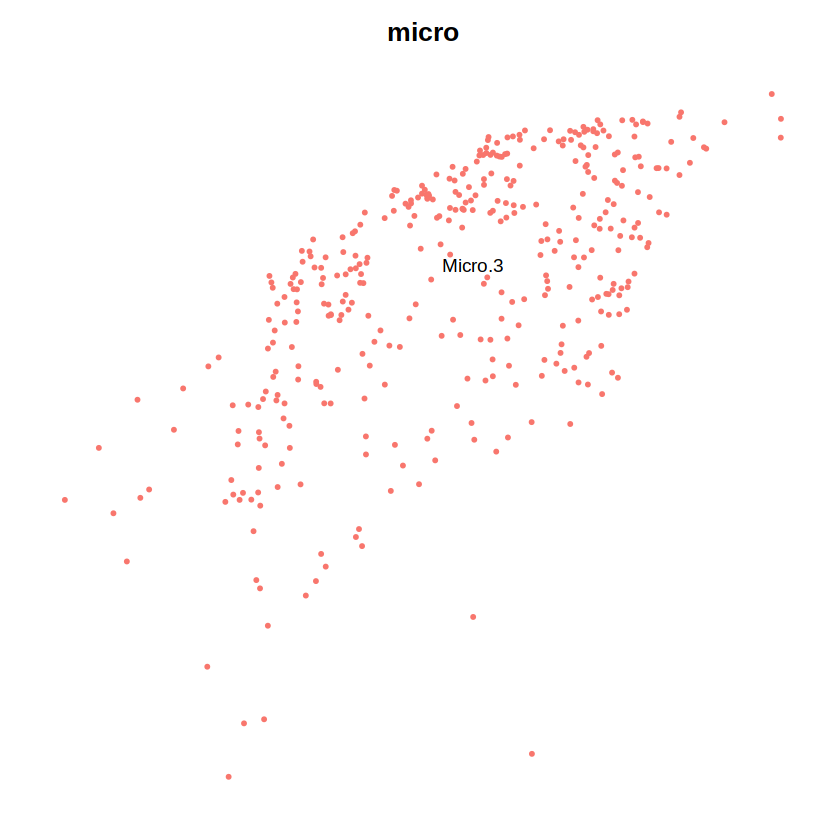

In [98]:
p <- DimPlot(seurat_obj,group.by='cellState',  label=TRUE) +
   umap_theme() + ggtitle('micro') + NoLegend()

p

In [46]:
seurat_obj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,Sample_ID,Gender,PS1,PMI,⋯,FBW,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.6,SCT_snn_res.0.8,SCT_snn_res.1,seurat_clusters,cellType,nucleiID,cellState
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
sample19_CTGGTCTCACGATTCA,p479,7620,2698,0.07874016,5318,2627,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_CTGGTCTCACGATTCA,Micro.3
sample19_TGCTTGCTCCAAATGC,p479,7199,2609,1.01402973,5262,2574,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_TGCTTGCTCCAAATGC,Micro.3
sample19_CTCAACCTCAGACTGT,p479,7203,2566,0.49979175,5268,2538,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_CTCAACCTCAGACTGT,Micro.3
sample19_GGCTTTCTCGGCCTTT,p479,6728,2482,0.38644471,5222,2480,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_GGCTTTCTCGGCCTTT,Micro.3
sample19_TCCTTTCCAGGCGATA,p479,6674,2594,0.22475277,5209,2594,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_TCCTTTCCAGGCGATA,Micro.3
sample19_CCAATTTGTCCGTTTC,p479,6579,2477,0.36479708,5170,2477,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_CCAATTTGTCCGTTTC,Micro.3
sample19_TATATCCTCCACCCTA,p479,6486,2558,0.44711687,5207,2558,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_TATATCCTCCACCCTA,Micro.3
sample19_AGGAATAGTAGCTCGC,p479,6420,2930,0.62305296,5262,2930,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_AGGAATAGTAGCTCGC,Micro.3
sample19_ATTACTCAGCTACTAC,p479,6413,2455,0.51457976,5186,2455,sample19,2,0,15,⋯,1225,7,7,8,24,5,5,Micro,sample19_ATTACTCAGCTACTAC,Micro.3


In [99]:
seurat_obj <- SetupForWGCNA(
  seurat_obj,
  gene_select = "fraction", # the gene selection approach
  fraction = 0.05, # fraction of cells that a gene needs to be expressed in order to be included 5%
  wgcna_name = "brasse_etal" # the name of the hdWGCNA experiment
)

In [100]:
# construct metacells  in each group
seurat_obj <- MetacellsByGroups(
  seurat_obj = seurat_obj,
  group.by = c("Sample_ID",'cellType'), # specify the columns in seurat_obj@meta.data to group by
  reduction = 'pca',
    k =36 ,# select the dimensionality reduction to perform KNN on
  max_shared = 10, # maximum number of shared cells between two metacells
  ident.group = 'cellType'
  )

# normalize metacell expression matrix:
seurat_obj <- NormalizeMetacells(seurat_obj)

Normalizing layer: counts



In [75]:
Assays(seurat_obj)

[1] "RNA" "SCT"

In [101]:
DefaultAssay(seurat_obj) <- "RNA"

In [102]:
DefaultAssay(seurat_obj)

[1] "RNA"

In [103]:
seurat_obj <- SetDatExpr(
  seurat_obj,
  group_name = c("Micro"),# the name of the group of interest in the group.by column
  group.by='cellType',# the metadata column containing the cell type info. This same column should have also been used in MetacellsByGroups
  assay = 'RNA', 
  slot = 'data' # using normalized data
)

pickSoftThreshold: will use block size 4843.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4843 of 9237
   ..working on genes 4844 through 9237 of 9237
stem call
FT.R.sq slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.204  7.62          0.720 4650.00   4670.00 4990.0
2      2    0.270 -3.93          0.677 2600.00   2550.00 3150.0
3      3    0.595 -4.12          0.792 1570.00   1520.00 2210.0
4      4    0.689 -3.36          0.850 1000.00    949.00 1640.0
5      5    0.738 -2.88          0.888  672.00    618.00 1270.0
6      6    0.778 -2.61          0.910  467.00    417.00 1010.0
7      7    0.795 -2.46          0.909  335.00    289.00  822.0
8      8    0.816 -2.34          0.916  247.00    205.00  681.0
9      9    0.841 -2.24          0.928  186.00    148.00  572.0
10    10    0.863 -2.15          0.939  143.00    110.00  486.0
11    12    0.889 -2.03          0.951   88.40     62.50  361.0
12    14    0.895 -1.95      

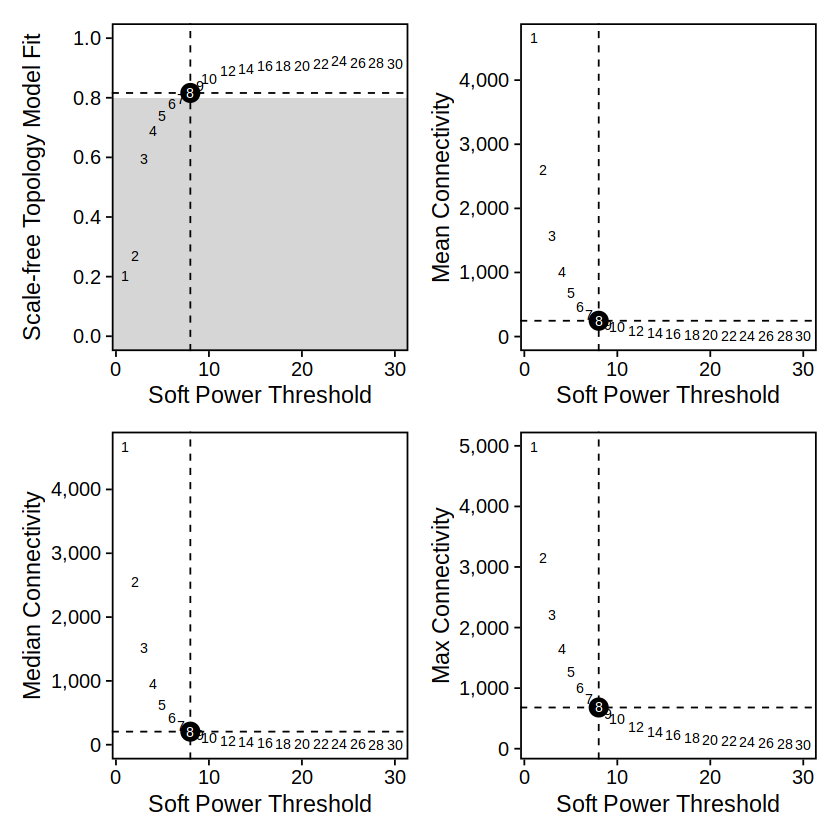

In [104]:
# Test different soft powers:
seurat_obj <- TestSoftPowers(
  seurat_obj,
  networkType = 'signed' # you can also use "unsigned" or "signed hybrid"
)

# plot the results:
plot_list <- PlotSoftPowers(seurat_obj)

# assemble with patchwork
wrap_plots(plot_list, ncol=2)

In [105]:
seurat_obj <- ConstructNetwork(
  seurat_obj,
  tom_name = 'microstate3_Presympt' # name of the topoligical overlap matrix written to disk
)

Soft power not provided. Automatically using the lowest power that meets 0.8 scale-free topology fit. Using soft_power = 8
 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will use 8 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


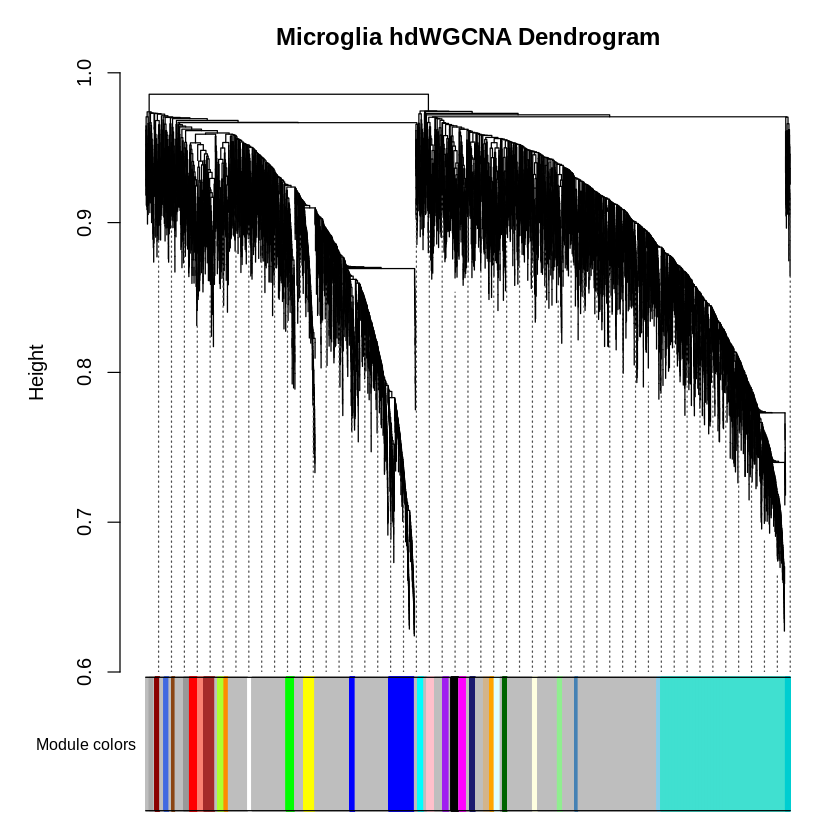

In [106]:
PlotDendrogram(seurat_obj, main='Microglia hdWGCNA Dendrogram')

In [107]:
# need to run ScaleData first or else harmony throws an error:
seurat_obj <- ScaleData(seurat_obj, features=VariableFeatures(seurat_obj))

Centering and scaling data matrix



In [108]:
# compute eigengene-based connectivity (kME):
seurat_obj <- ModuleEigengenes(
 seurat_obj,
 group.by.vars="Sample_ID"
)

[1] "darkgreen"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcadarkgreen to pcadarkgreen_”
pcadarkgreen_ 1 
Positive:  EPN2, SEMA6A, KLHDC4, MAPK3, NMRAL1, FBXW5, ELAVL4, ZNF274, SUPT20H, PSIP1 
	   PLEKHJ1, LINC00862, L3MBTL3, CNOT7, DCAF1, SYP, HSPA14.1, ZNF398, AL627309.1, FBXO38 
	   NUP50, ZNF141, METTL3, ECT2, PRPF38A, VRK1, STK35, B4GALT7, MANBAL, FHOD1 
Negative:  ANKS1A, FCGR1A, HLA-DRB1, SDAD1, VPS8, ZC3H4, HNRNPD, HMBOX1, STAU2, CDC27 
	   CDC42, SAMD4B, FCGRT, RTCB, TGDS, NUDT21, AFG1L, MAP4K5, CASP4, SYPL1 
	   LMBRD2, UTP25, METTL9, RIPK1, NUP210, UBE2Q1, PPP1R3D, ZNF140, SPOPL, ACTR1B 
pcadarkgreen_ 2 
Positive:  FBXW5, PPIL3, CDKL1, STK35, RIPK1, UBE2Q1, L3MBTL3, FCGRT, VRK1, ATP13A2 
	   PTPN23, SAMD4B, CD93, SYP, FCGR1A, SYPL1,

[1] "turquoise"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaturquoise to pcaturquoise_”
pcaturquoise_ 1 
Positive:  TBCC, TMEM147, H2AFJ, ARHGAP42, DALRD3, DYNC1I1, TUSC2, TMEM127, AC114763.1, SMIM29 
	   MFN2, AC018816.1, MZT2A, SAMD9, IPO9-AS1, VPS11, KCTD5, LINC01322, TRIQK, LILRB3 
	   NMRK1, ZNF333, FYCO1, ZNF682, BHLHB9, NUDT19, EMC4, TNFAIP1, P4HTM, AKAP12 
Negative:  XIST, NAIP, NEAT1, TBXAS1, RASSF4, SLC9A9, INPP5D, FYB1, RNF150, PLXDC2 
	   FRMD4A, CELF2, SLCO2B1, CPVL, FAM49B, LY96, MARCH1, KCNMA1, DOCK8, LINC02232 
	   FTX, ATXN1, CCDC26, CYFIP1, ACER3, MIR646HG, RCSD1, RASAL2, PTPRC, RAD51B 
pcaturquoise_ 2 
Positive:  KCNMA1, KMT5B, EMILIN2, FAM20A, SLC22A23, DBP, LILRB4, RNF149, RBM47, FPR3 
	   AC016831.7, ASAH1, PIK3AP1, PDK1, AL031777.3, LPAR2, CAMKK1, UNKL, TNFRSF1A, LILRB3 
	   SH2D3C, CEBPD, NEAT1, PDE7B, TNFAIP2, TRAF3, NBPF1, NQO2, PIK3CD, ABL1 
Negative:  AP001347.1, HELLS

[1] "grey"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagrey to pcagrey_”
pcagrey_ 1 
Positive:  MALAT1, DOCK4, DOCK2, ELMO1, SLC8A1, JAZF1, CHST11, DISC1, SPATA6, RUNX1 
	   EIF4G3, LDLRAD4, NAV3, BMP2K, NCK2, SLC1A3, TBC1D14, RIN3, DENND3, ST6GAL1 
	   BIRC6, AFF1, DPYD, SUSD6, CAMK1D, SP100, TBC1D22A, SRGAP2C, PACSIN2, ARL15 
Negative:  NALCN, GRIA4, ERBB4, SNAPC1, CKS2, SIGLEC8, TM2D2, FAM107B, TMOD1, CD55 
	   FAM171A1, SH3GLB2, COPE, KDM5D, EMD, MYH10, CIC, RPL22, PPP1R9A, DPY30 
	   G6PC3, KLF2, NTRK3, IL3RA, VMA21, BCAN, CSMD3, SARS, NDUFS7, PODXL2 
pcagrey_ 2 
Positive:  NIPBL, AOAH, GALNT7, FAM172A, RABGAP1L, OXR1, TIAM1, ARSB, SSBP2, ZFP64 
	   MAML3, SRGAP1, KIAA0825, TBC1D22A, ACSF3, ATP2B1, NAV3, SLC12A6, PKD2, COG6 
	   KATNBL1, NAALADL2, ARHGEF11, LDLRAD4, TMCC3, RPS6KA5, APLF, ATM, ZCCHC17, MED13L 
Negative:  ACTB, MT-CO2, MT-ND3, NDRG4, TXNRD1, ACTG1, ADCY1, ATP6AP2, HLA-A, 

[1] "brown"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcabrown to pcabrown_”
pcabrown_ 1 
Positive:  TTC5, GTPBP6, RBM42, COA4, SEC16B, SNX11, ESRRA, CCDC126, MMP16, NME4 
	   NDUFAF1, TAF5L, AKAP8, GSTP1, SLC27A1, BFAR, RAMP1, SLC52A2, ZNF432, DHDDS 
	   AL360091.3, YPEL3, CTSF, LRP1B, ASNA1, ARF6, SQLE, DUS2, NXT1, DCUN1D5 
Negative:  BACH1, PTPRJ, UBE3C, GSK3B, PTPN12, EVI5, FCHSD2, NSMCE2, RIF1, MARCH7 
	   YWHAZ, CYTH4, TBCA, ITGA9, SOS1, CCNL2, FAM120A, RBM26, SPEN, RAD23B 
	   CASK, NEK6, ARFIP1, TATDN1, DHX9, ARID1A, NOTCH1, ZNF25, PAPOLA, ITGAM 
pcabrown_ 2 
Positive:  MACROD1, ZKSCAN8, RABEPK, FAM221A, TNRC6C, MMP16, LRP1B, FGL2, CASD1, CCT2 
	   NXT1, RIF1, ASXL2, CORO1C, NDUFA8, PPCS, RAD23B, PTPN12, PPARA, WDR55 
	   KIZ, RCN2, ZFYVE27, CYTH4, AKAP8, CSNK1A1, TRAF3IP2-AS1, FCHSD2, SPEN, OXCT1 
Negative:  KLHDC1, NSMCE2, PDZD8, SNCB, MAPKAPK2, NOTCH1, SLC10A7, PPARG, FKBP3, ECHDC1 

[1] "royalblue"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaroyalblue to pcaroyalblue_”
pcaroyalblue_ 1 
Positive:  DNAJC11, RBM39, UMAD1, APLP2, NASP, DDX46, POGZ, NAXD, PABPC1, RPS6KA3 
	   GNPTAB, SCAMP5, AC104316.1, PKP4, MLLT11, MYH9, SNRK, NR3C2, EFL1, CGAS 
	   MYO6, EMC2, RWDD1, PIGG, WBP4, AC007364.1, PRPS2, LINC01678, SLF1, EED 
Negative:  CNPPD1, HCFC1, CDC7, RAB1B, APH1B, FAM114A2, IL1A, IGSF11, CCDC59, FGF12 
	   NSUN4, API5, EBI3, AKAP8L, ITM2C, BORA, SETD7, AKAP17A, PAXIP1-AS2, SCAI 
	   ATAD3A, XRRA1, ZNF587, FBXL3, CERS4, RASSF3, UBLCP1, CDHR3, SIDT2, NAV2 
pcaroyalblue_ 2 
Positive:  ZNF587, FGF12, SCAMP5, NR3C2, CDHR3, CERS4, NAXD, AC007364.1, EBI3, DNAJC11 
	   ZNF251, TMEM38B, RASSF3, PRPS2, GNPTAB, PKP4, IL1A, LINC01678,

[1] "steelblue"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcasteelblue to pcasteelblue_”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
Warning message:
“Requested number is larger than the number of available items (52). Setting to 52.”
pcasteelblue_ 1 


[1] "green"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreen to pcagreen_”
pcagreen_ 1 
Positive:  TLNRD1, MTHFD1, DNAJA2, AC124312.1, DNAH1, TLE3, TTYH1, UBE2J1, EZH2, LINC01091 
	   POLR2M, CEBPZ, SAP30L, CIB1, AASS, AARS, PBX2, COL18A1, C1orf52, RRM2B 
	   CDH26, SRPRB, YIPF5, ZNF202, POMP, DDX20, TEX2, SERPING1, CBLB, BRI3 
Negative:  C1QC, C1QB, C1QA, CD81, CD74, FCGR3A, CST3, S100A11, TUBA1B, HLA-DPA1 
	   CEBPB, FOLR2, LAPTM5, COX4I1, TMBIM6, CANX, RPL8, SMDT1, SET, ABI3 
	   KCTD12, RNASE6, TMX1, RABAC1, ARPC1B, BAG5, WSB2, PSMB6, TMEM267, TUFM 
pcagreen_ 2 
Positive:  MORN1, YIPF5, GGCX, COL18A1, AC124312.1, DNAH1, BCLAF1, AARS, CIB1, TLNRD1 
	   UBAP2, TLE3, CDK2AP2, SET, SELPLG, ATP6V1A, POLR2M, CD180, LLPH, ZNF202 
	   MTHFD1, TXN2, PDCD2, NAA15, AC092069.1, SRPRB, PCBP1, CANX, CBLB, PBX2 
Negative:  CD74, ARPC1B, C1QA, FOLR2, EEF2, STRADB, COX4I1, CST3, C1QC, RRM2B 
	   TMX1, HL

[1] "darkorange"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcadarkorange to pcadarkorange_”
pcadarkorange_ 1 
Positive:  HNRNPR, ELP5, NAP1L4, MMAA, ECHDC2, RPA2, TOX4, SDHAF3, AP002954.1, SLC16A1-AS1 
	   SCARF1, HACD3, RNF6, RDX, RER1, ARHGAP9, RAB2B, YBX3, ATRAID, LDB2 
	   RC3H2, STUB1, TSN, UBR4, CBR1, ISCU, PCNP, OTUD6B, PARP1, BZW1 
Negative:  CD14, APOE, HLA-B, RPL29, RPS19, CYBA, EEF1A1, RPL10, HLA-E, PSAP 
	   RPL15, FTL, HLA-DRA, RPL13, FCER1G, ITGB2, RPL6, GPSM3, RPL23A, DNASE2 
	   CALR, PLD3, SSR2, RPS16, SCAMP2, PCDH12, SDF2L1, PPP1R8, KIDINS220, MYL6 
pcadarkorange_ 2 
Positive:  SCAMP2, ITGB2, FCER1G, HLA-E, PCDH12, CYBA, PSAP, HLA-B, UBR4, APOE 
	   PLD3, HLA-DRA, SSR2, KIDINS220, RNF6, CD14, CALR, SDF2L1, PCNP, MYL6 
	   PPP1

[1] "yellow"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcayellow to pcayellow_”
pcayellow_ 1 
Positive:  HSP90AA1, DUSP1, VMP1, FCGR2A, CTSZ, FBXL14, GLUL, SAT1, ACSL1, SIPA1L1 
	   HIF1A-AS2, NAMPT, CCL3, NR4A2, FKBP4, FMNL2, LRMDA, ELL2, ABCA1, TTYH3 
	   HSPA6, SCIN, FLT1, SLC7A5, RNF122, STOM, ANXA5, HSPA4, NET1, WDR61 
Negative:  PNO1, KIAA1191, TASP1, MAP1LC3B, ANKRD37, ZFYVE9, STX18, AP000787.1, SNRNP35, MAX 
	   PAFAH2, AFDN, C2CD2, ZFAT, C5orf15, MRS2, MAPK6, AC026202.2, FAM50A, CACUL1 
	   IL10, GNG2, PHPT1, DIRC3, CEND1, BCL3, KCND2, SNRPB2, RUVBL2, FAM53C 
pcayellow_ 2 
Positive:  LRMDA, RBM33, MRS2, POLR2A, ROCK1, POFUT2, STX18, CREBBP, MAX, NEIL2 
	   SIPA1L1, ACTN1, FAM241A, H2AFX, SOGA1, SH3BP5, PFKFB3, HIST2H2BF, RPTOR, APAF1 
	   AHI1, ELL2, HPRT1, MBOAT2, TNFRSF10D, PRPF40A, PDCD6IP, RAB28, C2CD2, WDR13 
Negative:  ABCA1, SQSTM1, DUSP1, WDR61, FKBP4, CCL3, CLEC7A, KLF6, SAT1,

[1] "black"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablack to pcablack_”
pcablack_ 1 
Positive:  GON7, STX5, PAPOLG, SUN2, EIF4EBP2, AC021594.2, LRRC4C, VBP1, GTPBP2, TXNDC16 
	   CDKN1B, SLC43A2, SESTD1, TIPRL, AL589740.1, IL12RB1, GSDMD, DZIP1L, ASH2L, AP001636.3 
	   PIK3CG, TUBA4A, HABP4, TNIK, HIST2H2BE, TMBIM1, FCHO1, TSPAN7, THUMPD3, KLHDC2 
Negative:  TVP23B, UBC, BTG2, SRGN, DIP2B, CLEC16A, SPPL3, EFR3A, LAMP2, UGDH 
	   BRD4, CRELD2, PCCA, ARG2, NFKBIZ, MS4A4A, DPYD-AS1, ERG28, MRPL47, TM9SF2 
	   THRB, ANK2, IFI44, TBC1D30, TAF15, STK25, CHCHD6, SOCS3, GPM6B, TRIM26 
pcablack_ 2 
Positive:  MEIS2, IL12RB1, CRELD2, RPL24, RTF1, PNRC1, AC021594.2, STX5, CHCHD6, TAF15 
	   THUMPD3, COX7B, PAPOLG, AL589740.1, THRB, LRRC4C, DZIP1L, ZNF589, ANK2, RIOK1 
	   GTPBP2, TTC8, SLC43A2, ANGPTL1, CMKLR1, FCHO1, TSPAN7, KLHDC2, RNASE1, HERPUD2 
Negative:  RUFY2, MX1, IFI44, EFR3A, ZNF490, EIF4

[1] "white"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcawhite to pcawhite_”
Warning message:
“Requested number is larger than the number of available items (57). Setting to 57.”
Warning message:
“Requested number is larger than the number of available items (57). Setting to 57.”
Warning message:
“Requested number is larger than the number of available items (57). Setting to 57.”
Warning message:
“Requested number is larger than the number of available items (57). Setting to 57.”
Warning message:
“Requested number is larger than the number of available items (57). Setting to 57.”
pcawhite_ 1 
Positive:  ASMTL, TMEM108, MICU1, CD151, GIT1, JRKL, ACOT7, ADAMTSL2, TSFM, CTCF 
	   PNPLA2, EPN1, LYPLA2, LYRM7, CCDC136, PDP1, IRAK1BP1, WRNIP1, P

[1] "lightgreen"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcalightgreen to pcalightgreen_”
pcalightgreen_ 1 
Positive:  CHD9, GDI2, KDM4C, SON, CCNK, FRG1-DT, EML2, GTPBP10, ZNF14, NSRP1 
	   MSANTD2, TSPAN3, LINC01355, PPM1K, TRAFD1, TAPBP, CYLD, FGD2, C12orf4, LLGL2 
	   MTMR3, CCNC, ZNF133, TDG, CLPX, CRLS1, TFEB, TNFRSF25, DNAJC2, KCTD21 
Negative:  ZNHIT3, AKIP1, SLC46A1, SNRPD1, ZNF571, NDUFC1, ABAT, ZBTB43, TIMM13, AC068724.3 
	   GCLC, BBIP1, TECR, AC068533.3, NSMF, ENOPH1, LSM3, GRM3, ZC4H2, PRKRIP1 
	   TLR3, TFIP11, ENPP4, PHF12, PDPN, UFM1, ETV3, ACTR8, APBB2, DBNL 
pcalightgreen_ 2 
Positive:  ZNF14, DBNL, CIR1, MOB3A, MSANTD2, GRM3, TIMM13, APBB2, ZC4H2, GCLC 
	   ZNF571, SLC46A1, TFIP11, NDUFC1, EML2, PDPN, TFEB, CLPX, NAGK, ZNH

[1] "darkturquoise"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcadarkturquoise to pcadarkturquoise_”
pcadarkturquoise_ 1 
Positive:  MRPS35, LRRC69, ERH, RBM12B, HSPB11, ZC3H18, ATP8A1, UBE3B, CDC42BPB, IRF7 
	   DHFR, GLMP, UQCRQ, MAP1S, AC090833.1, MCOLN1, OXA1L, STON2, MMS22L, VCPKMT 
	   CCDC124, PTGES2, EPC1, MRPL22, RNASE10, ILF3, SIRT3, NCBP2, E2F4, ARHGAP20 
Negative:  RAP1A, ENO1, TLK2, USO1, SCYL3, AC092652.2, PARVB, ARMH3, FAM213A, NCOR2 
	   DRG2, PCBP2, CDKL5, UBA3, APPL1, NUFIP1, LRRC25, AL117381.1, RPL30, FAM219B 
	   MTFMT, CNOT11, SLC19A1, CNIH1, SF1, NEDD4, CDC5L, CCDC144NL-AS1, AL390728.6, ASB13 
pcadarkturquoise_ 2 
Positive:  VCPKMT, CCDC144NL-AS1, RNASE10, LRRC25, GLMP, OXA1L, SCYL3, UBA3, IRF7, MTFMT 
	   MRPS35, CNOT11, RPL

[1] "orange"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaorange to pcaorange_”
pcaorange_ 1 
Positive:  HSP90B1, TPR, CD53, ATP6V1E1, WNT5A, RAB5B, ATF2, IPO11, FNBP4, AL390729.1 
	   AC091948.1, TFG, CNOT9, MDM2, HMGXB4, TMEM245, ISG20L2, ARNT, LZIC, ZNF260 
	   SNAPC5, REV3L, CAPN1, VIRMA, HOOK3, LY86-AS1, AP4B1, FXR2, ETFA, MBD1 
Negative:  BRPF1, HLA-DQB1, PHKA2, UBE3D, ATP5S, CCDC174, AC138150.1, HIRA, SLC22A17, ZNF79 
	   SV2A, NDUFB3, PRKCSH, BEX4, LRRC37A, PILRA, IFT88, R3HCC1, GHITM, UNC13B 
	   DPH7, LAS1L, TRIP6, METTL16, MBD4, DNAJC27, RHBDD2, CLSTN1, SCIMP, NOSIP 
pcaorange_ 2 
Positive:  ZNF260, SNAPC5, ATP5S, TPR, SCIMP, HMGXB4, FXR2, AC138150.1, WNT5A, HIRA 
	   AL390729.1, CCDC174, AC091948.1, ARNT, VIRMA, REV3L, FNBP4, BE

[1] "lightcyan"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcalightcyan to pcalightcyan_”
pcalightcyan_ 1 
Positive:  SH3D19, KCTD16, MED19, PIWIL4, PAXIP1, DNAAF2, RETREG2, TTC33, BLOC1S4, RCHY1 
	   MTMR2, SUMO3, GABPB2, SNRNP40, KMT5A, SLC39A14, STXBP4, ECI1, CDK5RAP1, JKAMP 
	   PIGB, PATZ1, SSFA2, LEPROTL1, PAFAH1B3, NUDT16L1, CAPS2, CARS, GTF2F1, ZC3H12C 
Negative:  HNRNPC, PIAS2, CPQ, CCDC40, ACSL4, CLCN3, AKNA, CEBPA, DTWD1, MIRLET7BHG 
	   PACRGL, MAPK1, RBM41, SEMA6A-AS1, CHD8, SCN1B, RMC1, GTF2I, EIF4G2, KDELR1 
	   SLC2A9, KLF16, AGAP5, ZNF124, JADE1, RAB39A, ARMC8, ZRANB2, MARK2, AXL 
pcalightcyan_ 2 
Positive:  EIF4G2, GPR137, SEMA6A-AS1, ECI1, CLCN3, PIWIL4, PAK1IP1, RBM41, CAPS2, RMC1 
	   PACRGL, SCN1B, LEPROTL1, GTF2I, CHD8, O

[1] "tan"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcatan to pcatan_”
pcatan_ 1 
Positive:  ZNF691, IMP4, KHNYN, ZNF546, MGME1, CCAR2, C3AR1, FRA10AC1, GABRB3, SVBP 
	   UPF2, MORC1, DCAF16, RRN3, USP38, PROSER1, PSMA7, RPAP1, POMK, ZBTB17 
	   AL158071.4, CCNJ, TADA3, XPNPEP1, RBCK1, ZNF746, NHSL1, GNPNAT1, SCG3, MAP2 
Negative:  MCM9, IER5L, YAE1D1, LARP1, TIMM9, ZMYM4-AS1, ERI2, MAP2K4, NAP1L1, LCMT1 
	   PWP1, GTF2H1, CALU, SGF29, FRS2, GNG7, SERPINA1, ZBTB11, TIMMDC1, AC010978.1 
	   DDX52, TRMT13, OSTC, EDF1, COPB1, RPS5, ZDHHC3, LIPA, RPS2, CREBZF 
pcatan_ 2 
Positive:  IER5L, GYS1, EDF1, ZMYM4-AS1, SCG3, MGME1, RPS5, TIMM9, AQR, RPAP1 
	   NHSL1, GTF2H1, YAE1D1, GNG7, TADA3, ANK3, NAP1L1, POLR2L, STRN, DDX52 
	   PWP1, LIG4, OST

[1] "magenta"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamagenta to pcamagenta_”
pcamagenta_ 1 
Positive:  NAP1L3, PDCD11, HRH1, MAP2K7, NECAB1, POLG2, ATP5MD, PRDM4, GNE, CTDSPL 
	   ENTPD3-AS1, CACNA2D1, GOLGA3, ZNF630, HSDL1, AC005670.2, DNAJA3, IGIP, LDLRAP1, PHF6 
	   EDRF1, FAM118B, MAPRE3, PFKFB2, LIMA1, STMN2, CRNKL1, RFX1, FAHD1, FOCAD 
Negative:  GAB2, CAMK2D, PCNX2, SLTM, VPS35L, AAK1, NCOA2, AC005154.6, KAT6A, SH3KBP1 
	   AP003481.1, AC090517.4, ZNF609, COPS4, RNF185, USP10, PHC3, NHLRC2, CROCC, GOPC 
	   MTG2, SS18, TP53BP1, OPHN1, ZMPSTE24, AC012150.1, ACBD3, ELP1, MOGS, IMMP1L 
pcamagenta_ 2 
Positive:  ACBD3, PSMD5, CROCC, PHF8, RNF185, TP53BP1, AAK1, CCDC25, SLTM, AHDC1 
	   PRDM4, COPS4, AP003481.1, MRPL13, FMR1, WDR59, ZMPSTE24, TMEM263, PLEKHA8, HSDL1 
	   VPS35L, ZNF384, GAB2, AC005670.2, DDX42, MIPEP, CAMK2D, CTDSPL, FOCAD, ZC3H3 
Negative:  USP10, EPM2A, NECAB1, OXNAD1,

[1] "saddlebrown"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcasaddlebrown to pcasaddlebrown_”
Warning message:
“Requested number is larger than the number of available items (53). Setting to 53.”
Warning message:
“Requested number is larger than the number of available items (53). Setting to 53.”
Warning message:
“Requested number is larger than the number of available items (53). Setting to 53.”
Warning message:
“Requested number is larger than the number of available items (53). Setting to 53.”
Warning message:
“Requested number is larger than the number of available items (53). Setting to 53.”
pcasaddlebrown_ 1 
Positive:  AC015813.2, FAM126A, LRP10, TMEM50A, SP2-AS1, TOR2A, GSPT1, MZT2B, RIOK3, LINGO1 
	   HADHA, MAP1A, PRDM10, AC090579.1, 

[1] "blue"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablue to pcablue_”
pcablue_ 1 
Positive:  HSPD1, HSPH1, P4HA1, HSPB1, NR4A1, SH3RF3, DNAJB1, CD83, BAG3, NR4A3 
	   ARHGAP26, DNAJA4, HSP90AB1, FMN1, SERPINH1, MGAT5, JUND, HIF1A, OTUD1, CTSB 
	   PTGES3, HNRNPU, IER5, TRA2B, DNAJA1, MT-ND4, B3GNT5, PPP1R15A, TTTY14, TFRC 
Negative:  HCN1, CNPY3, TCERG1, DEAF1, SGTA, HHEX, CYC1, LMO3, ANKRD13A, CWF19L1 
	   C9orf16, NME6, DCPS, C19orf38, SCG5, CERS5, EXOC8, MSH6, SLC20A2, PTAR1 
	   TCP1, KHSRP, DPP8, ZNF26, IL4I1, PDGFA, THUMPD1, CDCP1, CFL2, CXCL16 
pcablue_ 2 
Positive:  NR4A1, CD83, RASGEF1B, HSPD1, NR4A3, CCL4, OTUD1, SERPINH1, BAG3, IER5 
	   ATF3, RGS1, DNAJA4, JUN, HSPH1, DNAJB1, CSRNP1, SCML1, EGR3, BCAS2 
	   ADGRV1, CLK1, MCF2L2, FOSL2, IRAK2, OLR1, MT-ND4, ETS2, ZFAND2A, GPN1 
Negative:  TCF12, ITPR2, PRKCA, ACAP2, WDFY3, SH3RF3, PIK3R1, QKI, KCNQ3, ANKRD17 
	   SPRED1, STAG1,

[1] "lightyellow"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcalightyellow to pcalightyellow_”
pcalightyellow_ 1 
Positive:  PLXNA3, OTUD5, ZNF7, RING1, AL139125.1, ERMP1, ZRANB1, UTP6, C21orf62-AS1, C2CD2L 
	   AC098829.1, KAT5, ZNF721, MRAS, CABLES1, OAS1, VPS13A, B4GALT4, CCDC84, DIP2C 
	   MORC2, IREB2, PCLO, SPTLC1, CLEC9A, ASB6, SPPL2B, GRIK1, WASHC2A, CSGALNACT2 
Negative:  DOCK10, NEDD4L, ACBD6, DNAJC13, RHOT1, PTPRA, POU2F2, WDFY4, AC010618.3, ANKRD36C 
	   ELF2, RFX7, ZNF800, ERCC8, TAB2, EEA1, CPEB3, GAS7, RALGAPB, EPHB1 
	   AC021231.1, ESCO1, ST3GAL5, RMDN2, RCC2, OSBPL11, CFDP1, SUCLA2, DGKE, MFF 
pcalightyellow_ 2 
Positive:  EPHB1, MAIP1, EEA1, AC010618.3, ARID3A, CABLES1, TSG101, MORC2, BLMH, PARP12 
	   NAE1, ST3GAL5, MRAS, TAB

[1] "pink"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapink to pcapink_”
pcapink_ 1 
Positive:  DTNB, SHISA5, R3HCC1L, FAM13A-AS1, ARHGAP21, PEX3, FUS, LETMD1, ANAPC1, VPS13B 
	   CUX1, RUFY1, CHSY3, SYF2, NR3C1, COX11, PAK2, NDUFS5, RPL5, ERP44 
	   TAX1BP1, HERC2, RAF1, FAM198B, BUD23, DCTN4, KLHDC3, MSANTD4, PLEKHG1, NFIC 
Negative:  TBL1X, AL589843.1, ENOX1, PDHB, HMGA1, LRRC58, ATP5MC2, GAP43, EXOC5, MFSD8 
	   WDR5, NUP133, CBX1, NBPF14, SIRT7, PAICS, MOCS2, BOD1, BTBD8, UXT 
	   KIF3A, MILR1, ATP5MG, DAPK3, NDUFA12, TUBB, GPCPD1, USP42, DGUOK, PSMC2 
pcapink_ 2 
Positive:  RARS2, ZNF623, PIM3, DTNB, WDR5, PECR, ID2, RNF175, INTS7, FAM198B 
	   CHSY3, AF127577.2, DPF2, NR3C1, TBL1X, AL589843.1, NDUFV2, PPP3CC, UNC13C, FUCA2 
	   BOD1, ZMYM5, PAK2, EXOC5, KIF3A, ATP5MG, BTBD8, RUFY1, NUS1, FUS 
Negative:  ALKBH1, GPN2, COX11, PEX3, DAPK3, ANKRD50, THAP4, RGL2, SYF2, SHISA5 
	   FAM13A-A

[1] "salmon"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcasalmon to pcasalmon_”
pcasalmon_ 1 
Positive:  ZNF280C, ZNF180, RNF4, DUT, NAGLU, ZBTB24, FCHSD1, BCL9L, HMCES, EXOSC1 
	   EXTL3, AMD1, CANT1, EEF1B2, ZFAS1, SUMO2, CELF1, USP54, SREBF2, KPNB1 
	   SUPT16H, MFSD10, CTBP1, SMIM13, NDUFS8, CSTF2T, MT-ND5, TTC19, RTCA, CTIF 
Negative:  WDR33, DYNLRB1, LSM14A, GBP3, CHKA, GPR160, SORT1, PSMD4, TDRD3, ARL17A 
	   VRK3, ABHD10, DHX16, ZNF738, LEMD3, MAGI3, CTSC, ARL6IP5, FARSA, SEC16A 
	   ZNF778, ZBTB40, NAA20, BRF1, MRPS27, PRR5L, NACC2, PHTF1, ARFGEF1, TRNT1 
pcasalmon_ 2 
Positive:  ZNF439, ZNF608, NACC2, CTBP1, MFSD10, NDUFS8, KCNJ2, SREBF2, ZBTB40, FCHSD1 
	   SUPT16H, HMGCR, CELF1, UBE2Q2, RNMT, HMCES, TPD52, ZNF778, PSMD4, ARL17A 

[1] "cyan"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcacyan to pcacyan_”
pcacyan_ 1 
Positive:  ZNF770, CTBP1-DT, SIAH1, AL359644.1, NONO, JPT1, SMARCA4, CARD8-AS1, ZNF444, GPR132 
	   RBSN, EPHA1-AS1, HEXB, TMEM69, DNAJC6, UROD, TARS2, DHRS4-AS1, PDE1A, PQLC1 
	   HIST1H2BC, OPRM1, DCLK1, METTL6, LINC00513, SLC24A2, COX7A2, TRMT61B, SCD5, ATPAF1 
Negative:  GNAQ, PAG1, TGFBR1, SBF2, DARS, BMPR2, CLASP1, NUMB, SHOC2, NDUFA10 
	   PPARD, CLOCK, GALNT2, SERGEF, RPLP2, AC068205.1, LUZP1, YEATS2, SSBP1, MORC3 
	   MAGI1, NPL, ZNF654, PDCD7, AGAP1, MSI2, SMARCD3, AP3M2, MED27, NUP35 
pcacyan_ 2 
Positive:  AGAP1, CKMT2-AS1, RGL1, NDUFA10, UPRT, SMARCA4, PAG1, NOM1, SHOC2, UROD 
	   TGFBR1, SIAH1, PQLC1, JPT1, NUP35, ZNF770, TARS2, GNAQ, ORC3,

[1] "darkred"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcadarkred to pcadarkred_”
pcadarkred_ 1 
Positive:  TMEM9, UBE2D4, ASNS, SF3A3, TUBB2B, SRI, SPATA5L1, GPR107, DKK3, RHOBTB2 
	   POLR3E, MIF4GD, SPDYE3, RNLS, UVSSA, BCAR3, CS, CDK10, PLEKHH2, ANXA7 
	   SMARCB1, AP002336.2, MIGA2, CTU1, WBP2, IRAK1, ATOX1, KDM7A, POP5, ADGRL3 
Negative:  PPP6R2, TSEN15, HDAC2, ATP5F1A, IBTK, BBX, TACC1, WRN, TTC17, RHOQ 
	   DPM2, NDUFA5, AQP4, HLA-DPB1, RALGAPA1, CHM, PGRMC1, ATP5PF, CASP10, NBEA 
	   COPS2, TMEM43, ERGIC2, ERP29, PGLS, GIMAP6, LITAF, AIMP1, ZNF266, MYL12A 
pcadarkred_ 2 
Positive:  GRPEL1, COPS2, ARHGAP26-AS1, RALGAPA1, MYL12A, CHM, CS, AIMP1, ERGIC2, AQP4 
	   PLEKHH2, ZNF266, RHOBTB2, HLA-DPB1, PGLS, KDM7A, GIMAP6, POP5, ATP5PF, 

[1] "purple"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapurple to pcapurple_”
pcapurple_ 1 
Positive:  CLTC, SLC7A7, DDX6, TRIP11, SRSF2, PIP5K1C, SLC39A10, ATP6V0B, ARPC3, SMIM20 
	   TCF20, ROBO3, EYA3, IL13RA1, LMO7, ELAVL1, ZDHHC24, TUBB2A, SIMC1, OSBPL9 
	   NEFL, GCLM, SRP9, MT-ND4L, RPS23, NCK1-DT, SMIM37, C19orf12, GAPVD1, AC104123.1 
Negative:  ENO4, AL356108.1, GBA, TIMM22, ANKDD1A, SLC35D1, PIP4K2B, TMTC3, AL365356.1, CHCHD1 
	   ATP5F1D, MT-ATP8, BPNT1, ECSIT, PNRC2, ETFDH, ABCA5, CBWD6, PML, TRMT10C 
	   AC023051.1, CUL7, UBALD2, GJA1, RCC1L, MTO1, TROVE2, AC092691.1, PHLPP1, PFDN2 
pcapurple_ 2 
Positive:  SMIM20, ECSIT, ADRB2, LINC00662, TRMT10C, CUL7, C11orf24, SNX18, TIMM22, MT-ATP8 
	   SEC23B, GNPDA2, DDX6, PNRC2, ABCA5

[1] "skyblue"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaskyblue to pcaskyblue_”
Warning message:
“Requested number is larger than the number of available items (55). Setting to 55.”
Warning message:
“Requested number is larger than the number of available items (55). Setting to 55.”
Warning message:
“Requested number is larger than the number of available items (55). Setting to 55.”
Warning message:
“Requested number is larger than the number of available items (55). Setting to 55.”
Warning message:
“Requested number is larger than the number of available items (55). Setting to 55.”
pcaskyblue_ 1 
Positive:  FCGBP, ENTPD1, STAB1, SIL1, ARMH4, TBCK, ARHGAP18, TPRG1, HPS3, CCDC102B 
	   ZNF846, CDK6, CR381653.1, AP2A1, LACTB2, ZFPM1, ZNF267

[1] "midnightblue"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamidnightblue to pcamidnightblue_”
pcamidnightblue_ 1 
Positive:  NAT9, DTD1, SYNCRIP, PRKAB2, DAD1, PEX5, TEX264, RBM48, JAGN1, MRPL52 
	   PACRG, GDE1, USP8, AFAP1, PSMD6-AS2, RLIM, NAA60, AC015712.2, MSMO1, INF2 
	   YIPF4, AC004951.1, FAM214B, RPS24, HIST1H4C, GPR75-ASB3, AC138035.1, RPAIN, TBC1D9B, SPOP 
Negative:  EPB41L2, CPEB4, IKZF1, FOXJ3, ASCC3, SREK1, GNB4, AGO1, KLHDC10, STK32B 
	   PANK2, MYO9A, PPP6R1, GRAMD1A, SLC12A9, ZMYM3, SIAE, CCM2, B4GALT5, WDTC1 
	   TBCD, SLC7A8, GTF2F2, RBBP6, MAP3K3, AC091057.6, PLEKHO1, HIP1, ENTPD6, TEP1 
pcamidnightblue_ 2 
Positive:  TEP1, AFAP1, DAD1, HIST1H4C, RPS24, FAM214B, LMBRD1, JAGN1, WDR35, HERC3 
	   RLIM, TEX264, AGO1, ARPC5, T

[1] "red"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcared to pcared_”
pcared_ 1 
Positive:  KANSL1, TRIO, TRPM7, KIF2A, ACTR3, FUBP3, ZUP1, LPCAT2, ZNF516, TTC9C 
	   MKL2, RBM6, WASL, AKT2, USP22, PRKAA1, COLGALT1, OTUD6B-AS1, MRPL48, DNAJC7 
	   MTHFD2L, ARHGAP31, SH3TC1, PTPRM, LRP12, CLTA, ACADSB, CRKL, EP400, FAM3C 
Negative:  POMT2, MTPAP, LMO4, PPFIBP1, MYC, SEMA6B, CLIP2, VEZT, TRAPPC4, MRM2 
	   HMG20A, ARL13B, LAPTM4A, CAB39L, NPLOC4, SLC30A5, EPB41, LAMTOR3, GOLIM4, APOO 
	   RHBDD3, CYFIP2, FAM117B, FAM199X, SF3A2, RASD1, TMX4, TBPL1, TRMT2A, SLC41A2 
pcared_ 2 
Positive:  TIMM23B, FBXW2, HIBCH, HMG20A, TRMT2A, MOV10, FUBP3, MICU3, FAM3C, SLC30A5 
	   KPNA1, EP400, BRD8, TMEM181, MCF2L, CRKL, ZBTB10, TTC9C, ASNSD1, CTNNB1 
	   POLR2J, AC007192.2, POLR1B, HEG1, MRM2, TRPM7, CLPTM1, NFATC1, UTP4, OLA1 
Negative:  VTI1B, LMO4, APOO, MKL2, MYC, ACO1, RHBDD3, COX7A2L, DHX40, MTPAP 
	

[1] "darkgrey"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcadarkgrey to pcadarkgrey_”
pcadarkgrey_ 1 
Positive:  HELZ, NF1, ZNF106, TBC1D5, ERO1B, SLC9A8, TMEM182, RC3H1, UBN2, BLCAP 
	   ATR, SEC62, TTI1, AACS, BCKDHB, PTEN, OTUD4, KPNA6, SDF2, OAZ2 
	   PLXNA1, SIRPB2, DHX35, WIZ, HS1BP3, CNIH3, AP1G1, GRIK2, CSNK1G2, RBMS2 
Negative:  NFIX, AC008124.1, YTHDF3, SLC35F1, AC005786.3, NDRG2, TMEM150A, TWIST2, NT5C, NIN 
	   DYNLL1, GTF2A1, ZFP30, UNC50, CRTC2, SUB1, FAM210A, SRSF7, PCBP3, ITPKB 
	   Z83844.2, COPZ1, KAT7, KIF3B, AFG3L2, DSN1, Z93930.2, UBXN7, ZDHHC21, RRBP1 
pcadarkgrey_ 2 
Positive:  UBXN7, INTS13, YTHDF3, C16orf72, SLC35F1, BCKDHB, KIF3B, TTI1, CRTC2, SEC62 
	   UBN2, ITPKB, TMEM182, BLCAP, PTEN, ZFP30, ZNF106, TBC1D5, Z8384

[1] "grey60"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagrey60 to pcagrey60_”
pcagrey60_ 1 
Positive:  NDUFB2, TRAF3IP1, AP002495.2, MAGED2, HK2, PHLDB3, ZNF814, DGKA, PSMD3, AL139220.2 
	   SIAH2, LSM14B, PRPF39, FAM89B, NUDT4, LIMD1, TMEM223, SH3GL1, AC239798.2, NSFL1C 
	   HRAS, TCOF1, C19orf24, DERL1, RNF167, SNRPG, SAMD8, AL513327.1, HELB, MAT2B 
Negative:  CNBP, TOR1AIP1, OGDH, DIP2A, RGMB, CCDC85B, RNF111, LMBR1, M6PR, RHBDD1 
	   UBR3, CAPZA1, BRD1, GPX4, VAV2, RHOA, MRPL57, SLC25A11, SENP7, NIPA2 
	   LINC01268, TSPO, BCKDK, EBLN3P, HNRNPF, HSPA13, MRPL51, RWDD4, RSRC2, EIF5A 
pcagrey60_ 2 
Positive:  AC239798.2, XBP1, C19orf24, KIAA1211L, PRDX3, MAGED2, GPX4, EIF5A, SENP7, MRPL57 
	   NSFL1C, DGKA, CLIC1, C17orf80, RPS28, LMBR1,

[1] "greenyellow"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreenyellow to pcagreenyellow_”
pcagreenyellow_ 1 
Positive:  HDX, STK11, PTPRB, MZT1, CD2BP2, GPNMB, MRPL32, DAZAP1, AL159163.1, FARP2 
	   ZNF780A, ACYP1, SLC25A29, KBTBD2, KLHL18, AC004448.2, RGS6, WDR3, FAM114A1, PPP2R5B 
	   MRPL54, WDR17, NTM, HMOX2, ABCA3, HLA-DOA, NECTIN2, MRPS21, PC, SLC4A2 
Negative:  ATP2A2, GNAI2, ABT1, GPD1L, TMED2, TNF, TRAPPC8, SURF4, ANAPC11, DNAJB11 
	   BMPR1A, NCOA3, CAP1, RAB6A, FMN2, HBS1L, SMIM4, UCP2, CRELD1, POLR1A 
	   DR1, SLC35F5, RPL35, RAB14, NDFIP1, DDIT3, SERF2, KLF9, FAU, CCDC107 
pcagreenyellow_ 2 
Positive:  SEC22C, HLA-DOA, MRPL24, ZNF780A, MRPS21, PPP2R5B, UCP2, RNF8, DDIT3, STK11 
	   DR1, IDS, SLC27A4, ABCA3, GNAI2, MSL3, WDR3, P

In [109]:
# compute eigengene-based connectivity (kME):
seurat_obj <- ModuleConnectivity(
  seurat_obj,
  group.by = 'cellType', group_name = 'Micro'
)


In [110]:
# get the module assignment table:
modules <- GetModules(seurat_obj) %>% subset(module != 'grey')

# show the first 6 columns:
head(modules[,1:6])

,gene_name,module,color,kME_darkgreen,kME_turquoise,kME_grey
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
AL627309.1,AL627309.1,darkgreen,darkgreen,0.17137308,0.1109116,0.12540372
AL669831.5,AL669831.5,turquoise,turquoise,0.14457284,0.1848014,0.09343604
NOC2L,NOC2L,turquoise,turquoise,0.09270142,0.1453513,0.09765823
UBE2J2,UBE2J2,turquoise,turquoise,0.05666613,0.1595633,0.05873449
CCNL2,CCNL2,brown,brown,0.20947747,0.2062427,0.23612150
ATAD3A,ATAD3A,royalblue,royalblue,0.06121351,0.0145039,0.05774503


In [111]:
# get hub genes
hub_df <- GetHubGenes(seurat_obj, n_hubs = 30)

head(hub_df)

,gene_name,module,kME
,<chr>,<fct>,<dbl>
1,ANKS1A,darkgreen,0.3921476
2,HLA-DRB1,darkgreen,0.3794588
3,FCGR1A,darkgreen,0.3640969
4,SDAD1,darkgreen,0.3512074
5,ZC3H4,darkgreen,0.3296461
6,VPS8,darkgreen,0.3268130


In [112]:
# get hMEs from seurat object
MEs <- GetMEs(seurat_obj, harmonized=TRUE)
modules <- GetModules(seurat_obj)
mods <- levels(modules$module); mods <- mods[mods != 'grey']

# add hMEs to Seurat meta-data:
seurat_obj@meta.data <- cbind(seurat_obj@meta.data, MEs)

In [113]:
# Remanimg modules from color
seurat_obj <- ResetModuleNames(
  seurat_obj,
  new_name = "micro_state3_Presympt" # the base name for the new modules
)

In [24]:
saveRDS(seurat_obj, file="hdWGCNA_object_microState4.rds")

In [13]:
seurat_obj <- readRDS("/users/PAS2694/eblige2/hdWGCNA_object_oligo.rds")

ERROR: Error in readRDS("/users/PAS2694/eblige2/hdWGCNA_object_oligo.rds"): error reading from connection


[1] "oligo1"
[1] "oligo2"
[1] "oligo3"
[1] "oligo4"
[1] "oligo5"
[1] "oligo6"
[1] "oligo7"
[1] "oligo8"
[1] "oligo9"
[1] "oligo10"
[1] "oligo11"
[1] "oligo12"
[1] "oligo13"


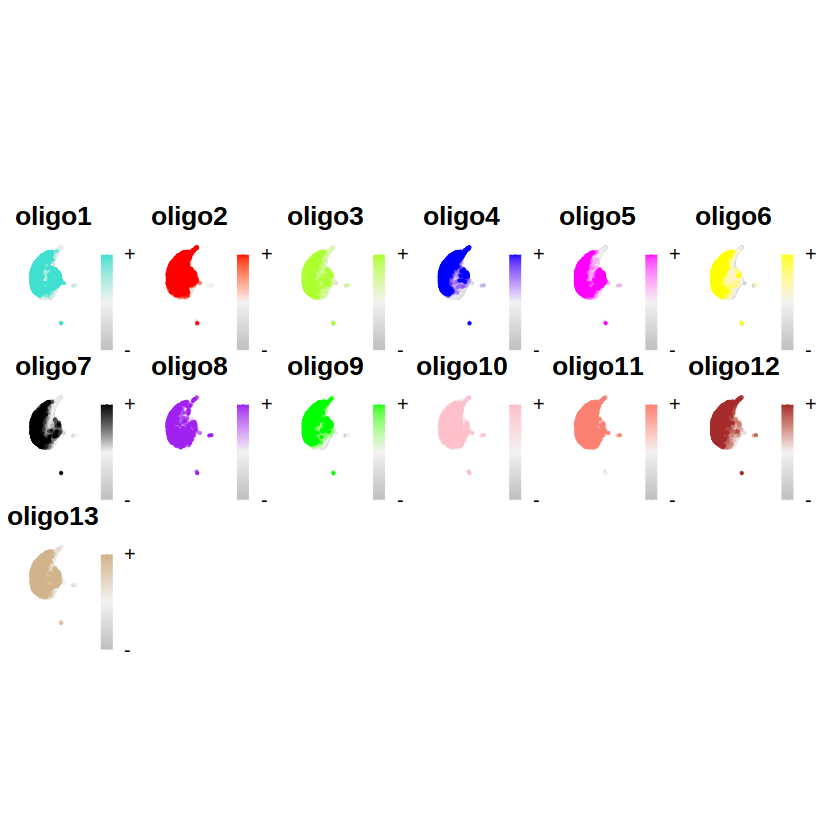

In [21]:
# make a featureplot of hMEs for each module
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  features='hMEs', # plot the hMEs
  order=TRUE # order so the points with highest hMEs are on top
)

# stitch together with patchwork
wrap_plots(plot_list, ncol=6)

In [ ]:
hub_df 

In [114]:
write.csv(hub_df , "hub_genes_micro3_Presympt.csv")

In [60]:
# Replace "cell_type_column" with the actual column name that has the cell type labels
seurat_obj <- SetIdent(seurat_obj, value = "cellType")

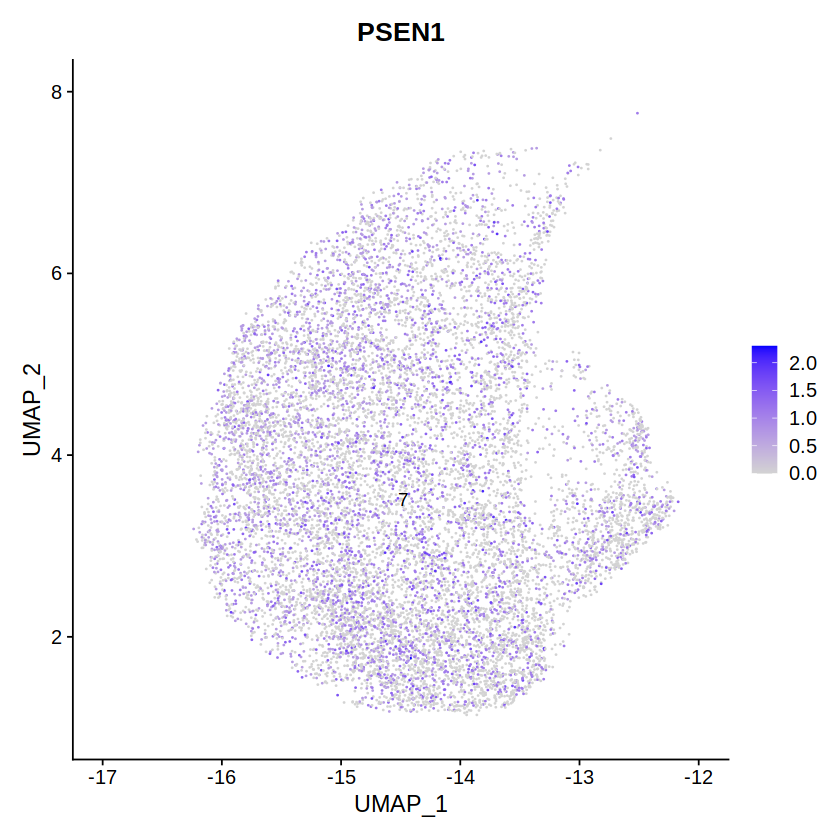

In [86]:
# Visualize the gene expression across clusters/cells
FeaturePlot(seurat_obj, features = "PSEN1", label =TRUE)




In [35]:
# Get the gene expression
gene_expression <- FetchData(seurat_obj, vars = "PSEN1")

# Get module eigengenes (replace with the correct location in your object)
module_eigengenes <- seurat_obj@reductions$pca@cell.embeddings

# Correlate the gene expression with each module eigengene
correlations <- cor(gene_expression, module_eigengenes)

# View correlations
print(correlations)


           PC_1       PC_2      PC_3      PC_4       PC_5       PC_6      PC_7
PSEN1 0.1419095 -0.1101216 0.1137932 0.1360361 0.02832494 0.07209806 0.1101375
               PC_8         PC_9       PC_10       PC_11      PC_12      PC_13
PSEN1 -0.0007452001 -0.004857861 -0.02287694 -0.05747329 0.06322665 0.06309276
            PC_14       PC_15       PC_16         PC_17     PC_18      PC_19
PSEN1 -0.05477529 -0.01154148 -0.06538693 -4.895535e-05 0.1417395 -0.1046482
           PC_20      PC_21      PC_22     PC_23      PC_24     PC_25     PC_26
PSEN1 0.09147458 0.08811569 -0.1313574 0.1195717 -0.1181145 -0.120087 0.1008657
             PC_27     PC_28       PC_29      PC_30      PC_31      PC_32
PSEN1 -0.005959526 0.0835959 -0.01417674 0.02732755 0.02066556 0.01085493
             PC_33       PC_34       PC_35     PC_36       PC_37      PC_38
PSEN1 -0.005795899 -0.03483985 -0.05985727 0.0128039 -0.03601884 0.08607024
           PC_39      PC_40       PC_41       PC_42       PC_43      P

In [115]:
write.csv(correlations , "ME_cor_micro3_Presympt.csv")

In [37]:
# Fetch metadata for cell types (assuming you have a cell type column)
cell_types <- seurat_obj@meta.data$cellType

# Compare gene expression across cell types
gene_expression_by_cell_type <- aggregate(FetchData(seurat_obj, vars = "PSEN1"), by = list(cell_types), FUN = mean)

# View gene expression by cell type
print(gene_expression_by_cell_type)


  Group.1     PSEN1
1   Micro 0.3491228


In [42]:

gene_module <- seurat_obj@meta.data[rownames(seurat_obj@meta.data) == "PSEN1", "module_assignments"]

# View the module assignment for the specific gene
print(gene_module)


NULL


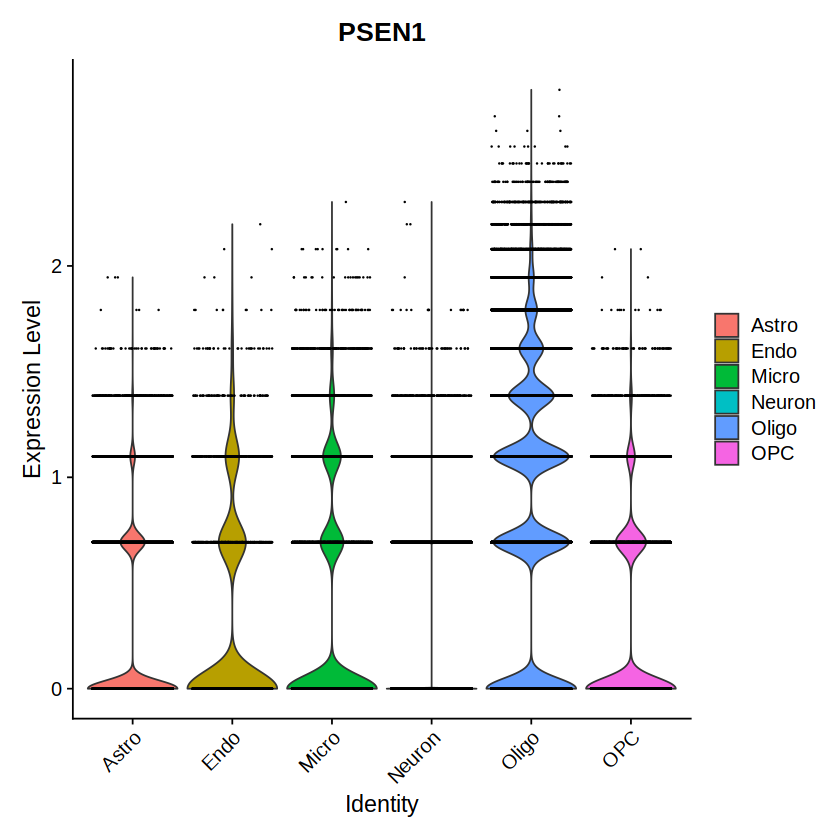

In [45]:
# Violin plot for a specific gene across clusters
VlnPlot(seurat_obj, features = "PSEN1", group.by = "cellType")


In [116]:
modules <- GetModules(seurat_obj) %>% subset(module != 'grey')

In [117]:
write.csv(modules , "modules_micro3_Presympt.csv")

In [35]:
modules

,gene_name,module,color,kME_micro1,kME_grey,kME_micro2,kME_micro3,kME_micro4,kME_micro5,kME_micro6,kME_micro7,kME_micro8,kME_micro9,kME_micro10,kME_micro11,kME_micro12
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,AL627309.1,micro1,turquoise,0.1076907468,0.09233792,0.0293709746,0.0124219777,0.1117672477,-0.031349231,0.040051138,-0.006297916,0.038808767,0.022785400,0.012179021,0.034850132,-0.0159309800
NOC2L,NOC2L,micro2,black,0.0619880750,0.05797147,0.0786242548,0.0003626538,0.0620693853,-0.013360558,0.001573923,-0.024010124,0.011168028,0.075984653,-0.016004032,0.026006018,-0.0229497178
SDF4,SDF4,micro2,black,0.0744988641,0.09052587,0.1073370376,0.0396422278,0.0808247612,-0.017504889,0.024274749,-0.022182018,0.060732501,0.043391849,-0.006230385,0.010332721,0.0104438327
UBE2J2,UBE2J2,micro1,turquoise,0.0957296230,0.08898166,0.0239016915,0.0177899117,0.0585051098,-0.011734435,0.026112086,-0.001827445,0.045447724,0.017863324,0.038116209,0.014029062,0.0244781222
ACAP3,ACAP3,micro3,greenyellow,0.0431198457,0.04956242,0.0127245298,0.0531424841,0.0149465946,0.062138505,0.011242226,0.000472570,0.042362881,-0.026393844,0.018849140,-0.015402054,0.0265749624
SSU72,SSU72,micro1,turquoise,0.0909071483,0.08675307,0.0922406763,0.0435479915,0.0660470554,-0.015419630,0.031097435,-0.009348079,0.049049950,0.035215796,0.005563853,0.010919998,-0.0035068605
GNB1,GNB1,micro4,blue,0.0750823334,0.12630211,0.0132777146,-0.0109934943,0.1688313696,-0.045815107,0.079051282,-0.009253362,0.061017371,0.017658561,-0.001908142,0.032027097,-0.0253179894
CAMTA1,CAMTA1,micro5,brown,0.0386117731,0.04675303,-0.0251065300,0.0111744164,-0.0001375787,0.064918590,0.005942497,0.025102828,0.029083586,-0.034106108,0.054803647,-0.005795962,0.0305590313
VAMP3,VAMP3,micro1,turquoise,0.0914228299,0.08361455,0.0591908652,0.0323767557,0.0447087638,-0.012419463,0.021087237,0.004382393,0.051922215,0.020513630,0.035992549,0.009585259,0.0299355979
